# Calculate the porphyrin dimensions

In [1]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1

# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
        'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
        'c-f':average(1.34),
        'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = (cc_bond*(3*mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

10.346864409554044 Angstroms


# Define and execute the simulation

The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 7.4E15 photosensitizers = (9.3E-13 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 3.8E-7

('photons per timestep: ', 1.74699162577986e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*5.42633320199086e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 411.318998088254*so*fa;

  // Species initializations:
  ps = 7.84710694078392e-07;
  e_ps = 4.2152873449902e-06;
  b_ps = 1.96617150066619e-12;
  mo = 0.00

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,,
0.000000,5.000000e-06,0.000000,0.000000e+00,0.000281,0.000000,0.006903,0.000000
124.137931,7.847110e-07,0.000004,6.779903e-14,0.000280,0.000002,0.006330,0.000573
248.275862,7.847110e-07,0.000004,1.355981e-13,0.000280,0.000002,0.005805,0.001098
372.413793,7.847110e-07,0.000004,2.033971e-13,0.000280,0.000002,0.005323,0.001580
496.551724,7.847110e-07,0.000004,2.711961e-13,0.000280,0.000002,0.004881,0.002022
620.689655,7.847109e-07,0.000004,3.389951e-13,0.000280,0.000002,0.004476,0.002427
744.827586,7.847109e-07,0.000004,4.067942e-13,0.000280,0.000002,0.004105,0.002798
868.965517,7.847109e-07,0.000004,4.745932e-13,0.000280,0.000002,0.003764,0.003139
993.103448,7.847109e-07,0.000004,5.423922e-13,0.000280,0.000002,0.003452,0.003451


top 1.1716717767115596
The raw oxidation data is being converting into a bacterial inactivation predictions. This may take a minute.
refinement loop:  15
refinement loop:  1447
refinement loop:  1468
refinement loop:  1488
refinement loop:  1502
The oxidation data was distilled into inactivation data in 1502 loops


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"Beirao_et_al, solution-32"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,medium,water
4,initial_time,0.0000E0
5,total_time (s),3.6000E3
6,timestep (s),1.2000E2
7,solution_depth (m),1.2670E-2
8,solution_area (m^2),1.9300E-4
9,solution_volume (m^3),2.4453E-6


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"Beirao_et_al, solution-32"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,5.0000E-6
4,photosensitizers,7.3630E15
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,3.7977E-7
7,photon_moles_per_timestep,1.7470E-6
8,dissolved_mo_molar,2.8126E-4
9,e_ps_decay_time (s),8.2500E-9


,oxidation,inactivation
time (hr),,
0.034483,0.082986,0.097221
0.068966,0.159087,0.359316
0.103448,0.228873,0.629777
0.137931,0.292869,0.792265
0.172414,0.351554,0.877723
0.206897,0.405369,0.923530
0.241379,0.454718,0.949513
0.275862,0.499972,0.965143
0.310345,0.541470,0.975050


hours to target: 1.0
hours to target: 1.0
--> ERROR: The value was never observed in the simulation predictions.





The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 1.5E16 photosensitizers = (1.9E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 7.6E-7

('photons per timestep: ', 1.74699162577986e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*5.42633320199086e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 411.318998088254*so*fa;

  // Species 

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,,
0.000000,0.000010,0.000000,0.000000e+00,0.000281,0.000000,0.006903,0.000000
124.137931,0.000002,0.000008,1.355980e-13,0.000278,0.000003,0.005811,0.001092
248.275862,0.000002,0.000008,2.711960e-13,0.000278,0.000003,0.004891,0.002012
372.413793,0.000002,0.000008,4.067941e-13,0.000278,0.000003,0.004118,0.002785
496.551724,0.000002,0.000008,5.423921e-13,0.000278,0.000003,0.003466,0.003437
620.689655,0.000002,0.000008,6.779901e-13,0.000278,0.000003,0.002918,0.003985
744.827586,0.000002,0.000008,8.135881e-13,0.000278,0.000003,0.002456,0.004447
868.965517,0.000002,0.000008,9.491861e-13,0.000278,0.000003,0.002067,0.004836
993.103448,0.000002,0.000008,1.084784e-12,0.000278,0.000003,0.001740,0.005163


top 1.0547819568094858
The raw oxidation data is being converting into a bacterial inactivation predictions. This may take a minute.
refinement loop:  6
refinement loop:  1815
refinement loop:  1835
refinement loop:  1852
refinement loop:  1866
The oxidation data was distilled into inactivation data in 1866 loops


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"Beirao_et_al, solution-34"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,medium,water
4,initial_time,0.0000E0
5,total_time (s),3.6000E3
6,timestep (s),1.2000E2
7,solution_depth (m),1.2670E-2
8,solution_area (m^2),1.9300E-4
9,solution_volume (m^3),2.4453E-6


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"Beirao_et_al, solution-34"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,1.0000E-5
4,photosensitizers,1.4726E16
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,7.5954E-7
7,photon_moles_per_timestep,1.7470E-6
8,dissolved_mo_molar,2.8126E-4
9,e_ps_decay_time (s),8.2500E-9


,oxidation,inactivation
time (hr),,
0.034483,0.158212,0.416499
0.068966,0.291397,0.881864
0.103448,0.403512,0.969574
0.137931,0.497890,0.988986
0.172414,0.577338,0.995047
0.206897,0.644215,0.997431
0.241379,0.700509,0.998529
0.275862,0.747897,0.999094
0.310345,0.787787,0.999410


hours to target: 1.0
hours to target: 1.0
--> ERROR: The value was never observed in the simulation predictions.





The photosensitizer dimensions as a disc = 1.0346864409554045e-09 m x 1.0346864409554045e-09 m x 1.5e-10 m.
Photosensitizer volume = 1.3E-28 m³
The volume proportion of 2.9E16 photosensitizers = (3.7E-12 m³ of photosensitizer)/(2.4E-6 m³ of solution) = 1.5E-6

('photons per timestep: ', 1.74699162577986e-06)
('molecular oxygen molecules: ', '2.8E-4')
('effective excitation watts: ', '4.3E-3')
// Created by libAntimony v2.12.0.3
model *pdipy_oxidation()

  // Compartments and Species:
  species ps, e_ps, b_ps, mo, so, fa, o_fa;

  // Assignment Rules:
  oxidation := o_fa/(o_fa + fa);

  // Reactions:
  _J0: ps -> e_ps; 20000000000000*5.42633320199086e-5*0.6*ps - 121212121.212121*e_ps;
  _J1: ps => b_ps; 6.96e-10*ps;
  _J2: e_ps + mo => so + ps; 0.48*50000000*e_ps*mo;
  _J3: so => mo; 16666.6666666667*so;
  _J4: so + fa => o_fa + mo; 411.318998088254*so*fa;

  // Species 

,[ps],[e_ps],[b_ps],[mo],[so],[fa],[ofa]
Time (s),,,,,,,
0.000000,0.000020,0.000000,0.000000e+00,0.000281,0.000000,6.902976e-03,0.000000
124.137931,0.000003,0.000017,2.711959e-13,0.000275,0.000007,4.911478e-03,0.001991
248.275862,0.000003,0.000017,5.423918e-13,0.000275,0.000007,3.494452e-03,0.003409
372.413793,0.000003,0.000017,8.135877e-13,0.000275,0.000007,2.486247e-03,0.004417
496.551724,0.000003,0.000017,1.084784e-12,0.000275,0.000007,1.768915e-03,0.005134
620.689655,0.000003,0.000017,1.355979e-12,0.000275,0.000007,1.258554e-03,0.005644
744.827586,0.000003,0.000017,1.627175e-12,0.000275,0.000007,8.954323e-04,0.006008
868.965517,0.000003,0.000017,1.898371e-12,0.000275,0.000007,6.370782e-04,0.006266
993.103448,0.000003,0.000017,2.169567e-12,0.000275,0.000007,4.532643e-04,0.006450


top 1.0133350089275637
The raw oxidation data is being converting into a bacterial inactivation predictions. This may take a minute.
refinement loop:  2
refinement loop:  1688
refinement loop:  1709
refinement loop:  1725
refinement loop:  1737
The oxidation data was distilled into inactivation data in 1737 loops


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,parameter,value
0,simulation_path,"Beirao_et_al, solution-36"
1,singlet_oxygen_diffusion_distance (m),8.0000E-8
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,medium,water
4,initial_time,0.0000E0
5,total_time (s),3.6000E3
6,timestep (s),1.2000E2
7,solution_depth (m),1.2670E-2
8,solution_area (m^2),1.9300E-4
9,solution_volume (m^3),2.4453E-6


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:


C:\Users\Andrew Freiburger\AppData\Roaming\Python\Python37\site-packages\sigfig\sigfig.py:572: UserWarning:




,variable,value
0,simulation_path,"Beirao_et_al, solution-36"
1,fa_g/L_conc,8.4772E-1
2,fa_molar,6.9030E-3
3,photosensitizer_molar,2.0000E-5
4,photosensitizers,2.9452E16
5,molecular_volume (m^3),1.2612E-28
6,volume_proportion,1.5191E-6
7,photon_moles_per_timestep,1.7470E-6
8,dissolved_mo_molar,2.8126E-4
9,e_ps_decay_time (s),8.2500E-9


,oxidation,inactivation
time (hr),,
0.034483,0.288498,0.893570
0.068966,0.493776,0.994966
0.103448,0.639830,0.999216
0.137931,0.743746,0.999791
0.172414,0.817679,0.999925
0.206897,0.870283,0.999968
0.241379,0.907710,0.999984
0.275862,0.934338,0.999991
0.310345,0.953283,0.999995


hours to target: 0.896551724137931
hours to target: 0.896551724137931
--> ERROR: The value was never observed in the simulation predictions.







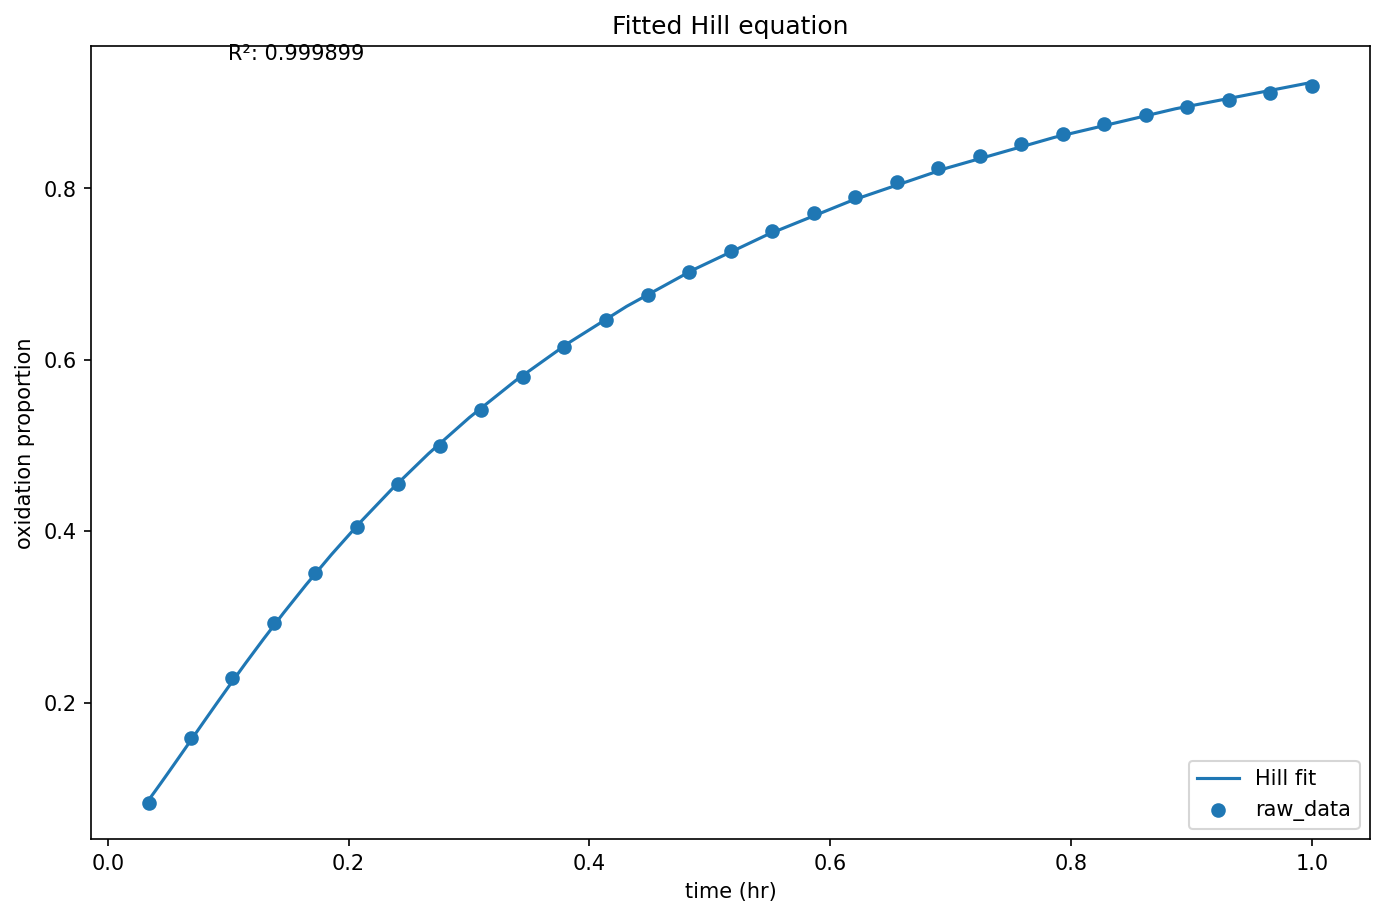

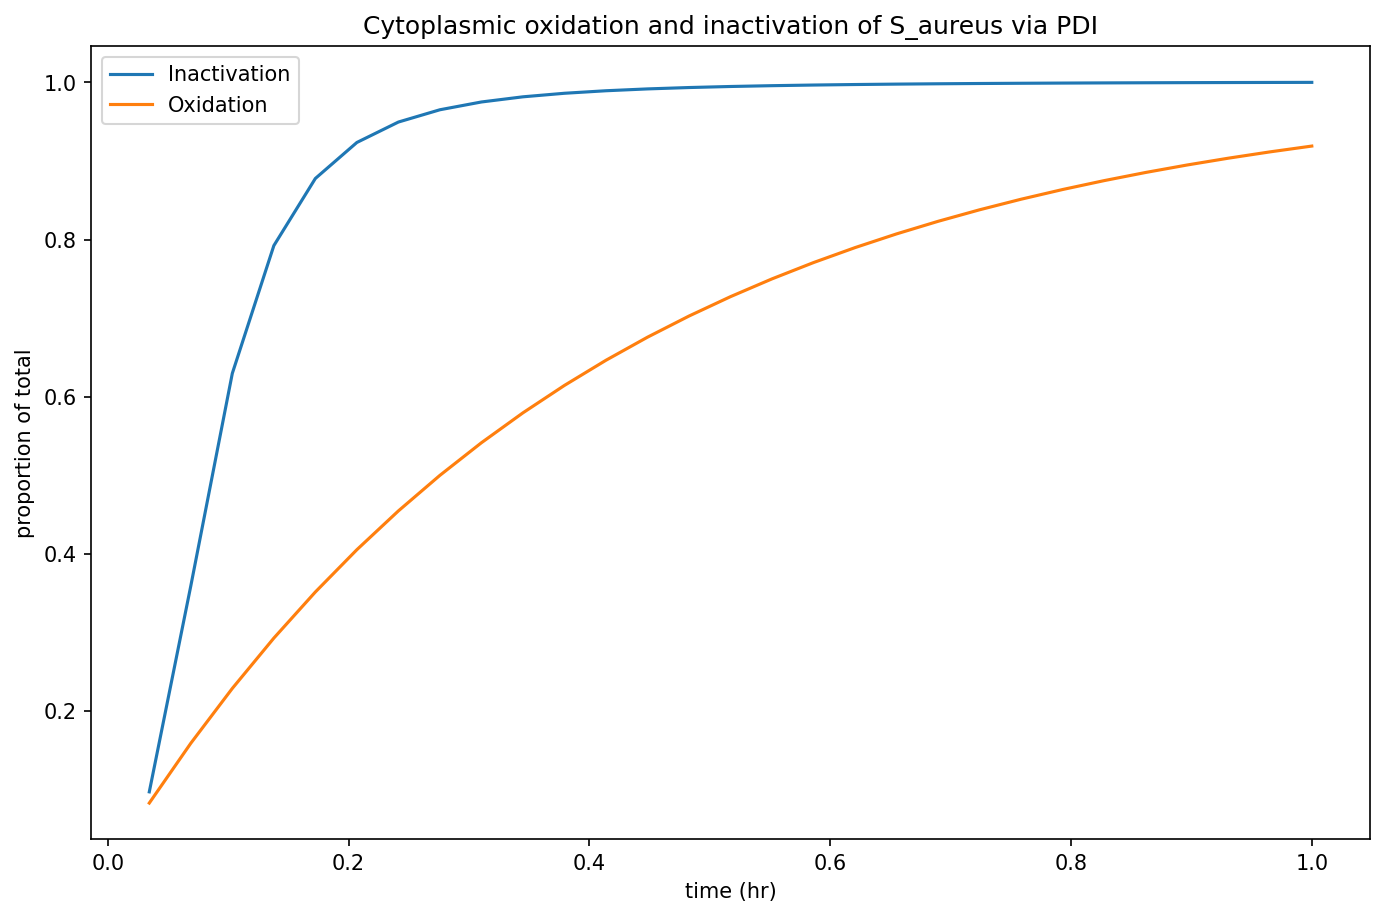

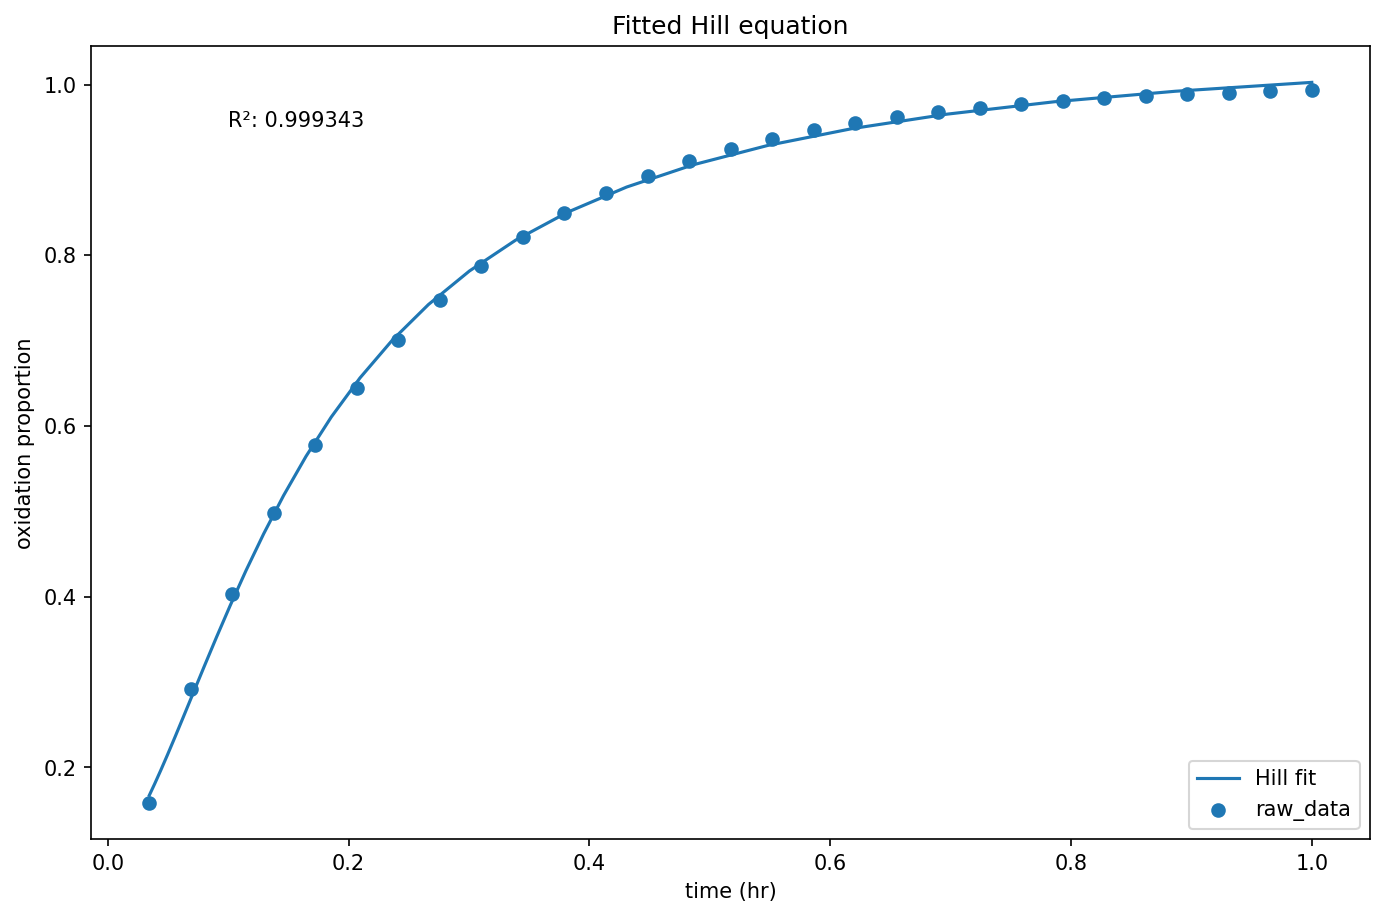

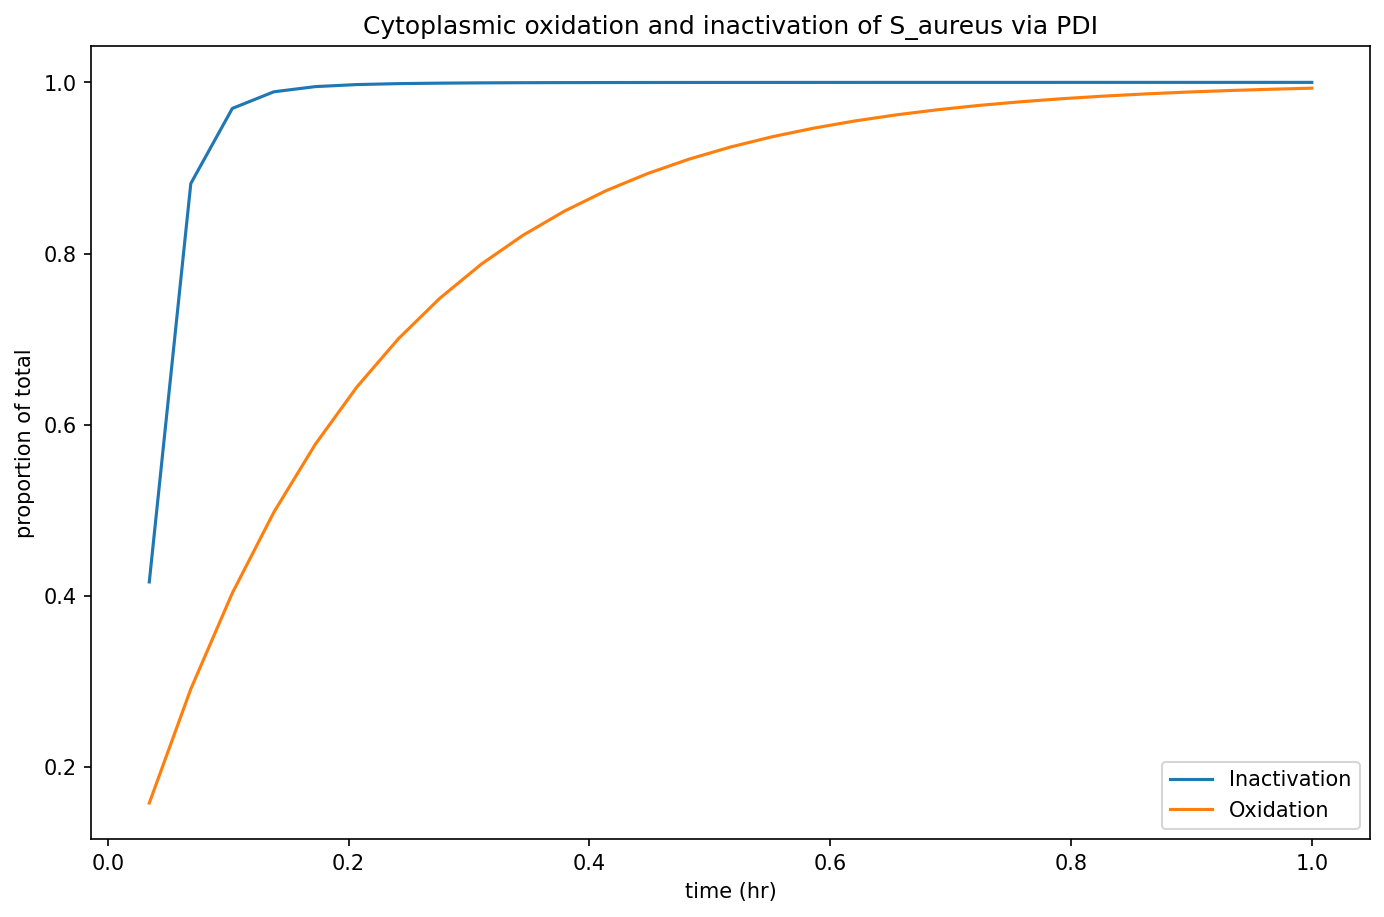

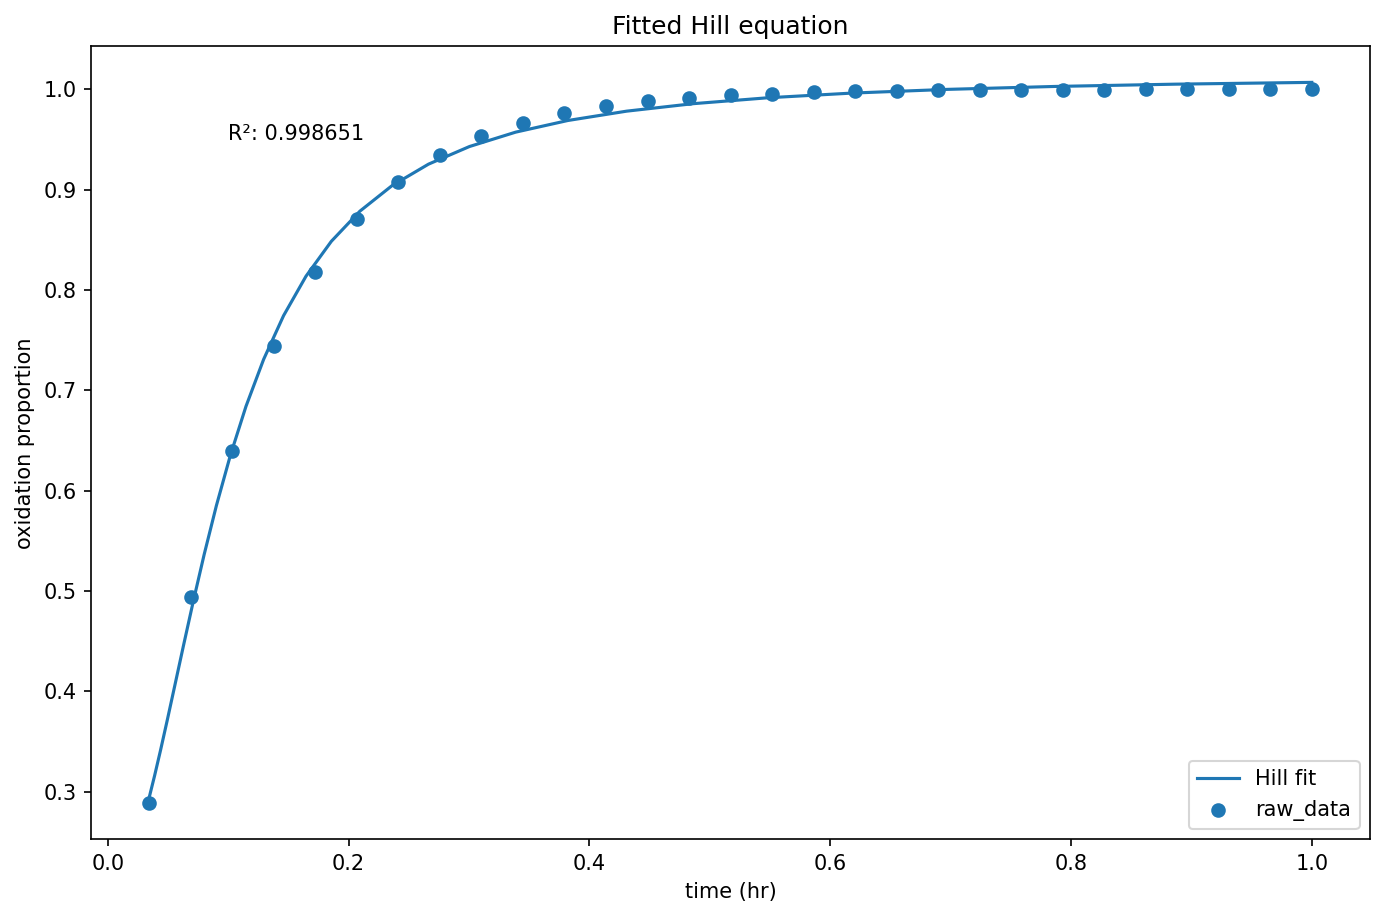

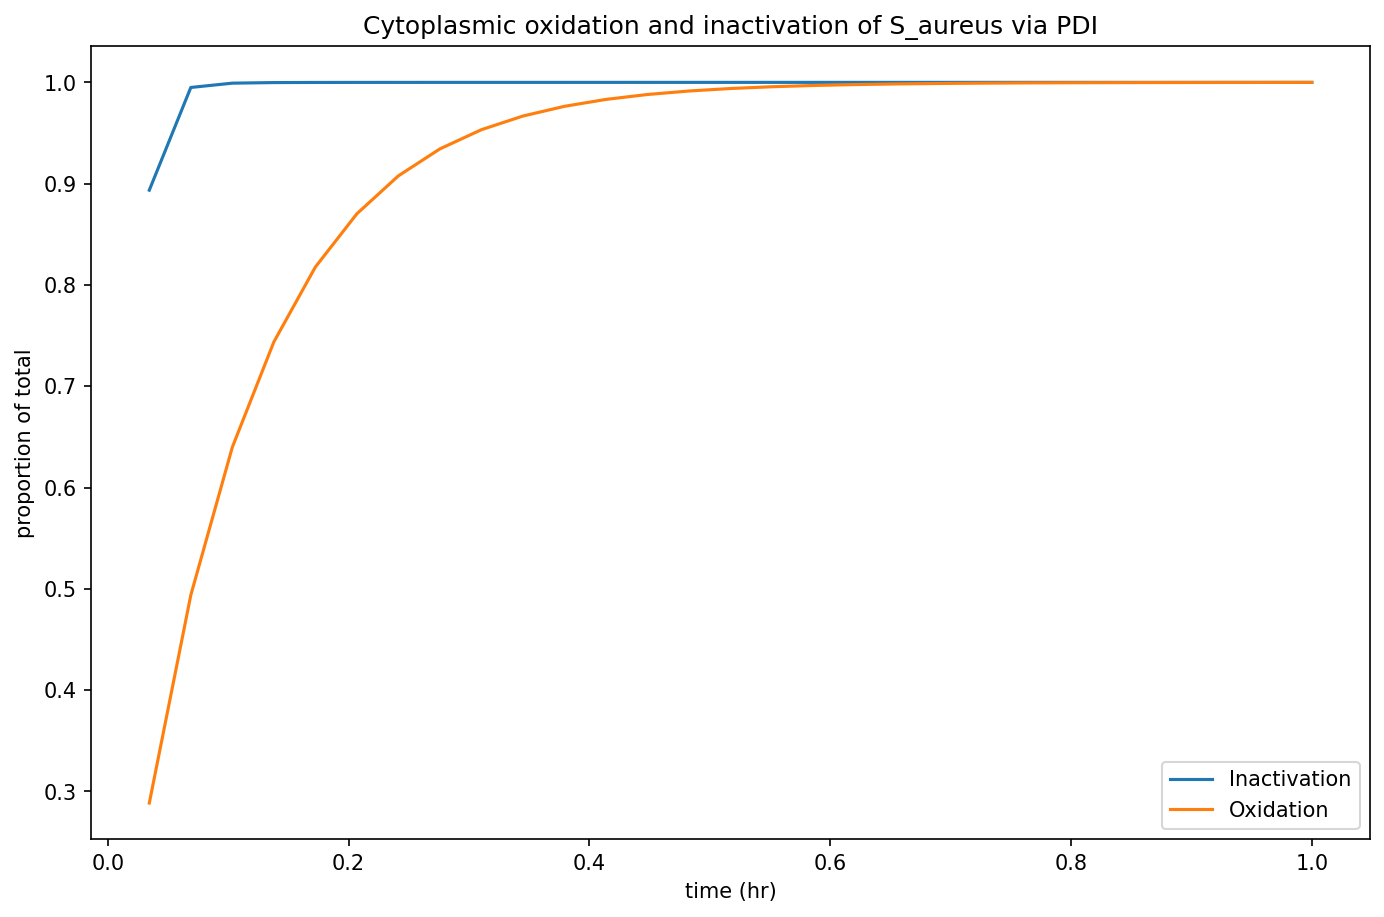

In [20]:
from scipy.constants import micro
from uncertainties import ufloat
%run ../../pdipy/core.py
%matplotlib inline

# define photosensitizer parameters
photosensitizer = {
    'name': '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide',
    'mw': {
        'value':1186.462   # mass with iodides included, sans iodides 678.84,
    },
    'dimensions':{
        'length (A)': total_length,
        'width (A)': total_length,
        'depth (A)': 1.5,
        'shape': 'disc',
    }
}

# define the light parameters
irradiance = 4
light_source = {
    'name': 'OSRAM 2\' 18W/840 lamps',
    "visible_proportion": {
      "value": (700-390)/(700-380),
    }
}


# define general parameters
verbose = True
jupyter = True
bacterial_cfu_ml = 1E8
timestep = 2
total_time = 60
bacterial_specie = 'S_aureus'
photosensitizer_molars = [5*micro, 10*micro, 20*micro]
export_name = 'Beirao_et_al, solution'

# execute the simulation
target_reduction = 1-10**(-7.6)
for photosensitizer_molar in photosensitizer_molars:
    pdi = PDIBacterialPkg(verbose, jupyter)
    pdi.define_system(timestep, total_time, bacterial_cfu_ml = bacterial_cfu_ml)
    pdi.define_bacterium(bacterial_specie)
    pdi.define_photosensitizer(photosensitizer, photosensitizer_molar)
    pdi.define_light(light_source, irradiance)
    pdi.singlet_oxygen_calculations()
    pdi.kinetic_calculation()
    processed_data = pdi.data_processing()
    pdi.export(export_name)
    display(processed_data)

    # affirm the accuracy of the prediction
    value, unit = pdi.data_parsing(target_reduction)    
    if value is not None:
        print(value, unit)
        actual_value = 1
        tolerance = actual_value*0.5
        acceptable_range = [actual_value-tolerance, actual_value+tolerance]
        acceptable_range_float = ufloat(actual_value, tolerance)
        if acceptable_range[0] < value < acceptable_range[1]:
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.')
    else:
        print('--> ERROR: The value was never observed in the simulation predictions.')
    print('\n\n\n\n')